In [14]:
import pandas as pd
import sklearn as skt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(r"C:\Users\AmlanChatterjee\Documents\Project\Heart Attack\Medicaldataset.csv")
df.head(3)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative


In [36]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,56.201821,0.659332,77.553111,127.160091,72.251897,146.662898,15.284885,0.360450
std,13.639861,0.474114,43.097335,26.129855,14.025261,74.944304,46.343074,1.154867
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.660000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.750000,5.807500,0.085000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [44]:
mean_heart_rate = df['Heart rate'].mean()
df['Heart rate'] = df['Heart rate'].replace(1111, mean_heart_rate)
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000
mean,56.201821,0.659332,75.984906,127.160091,72.251897,146.662898,15.284885,0.360450
std,13.639861,0.474114,15.265395,26.129855,14.025261,74.944304,46.343074,1.154867
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.660000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.750000,5.807500,0.085000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000


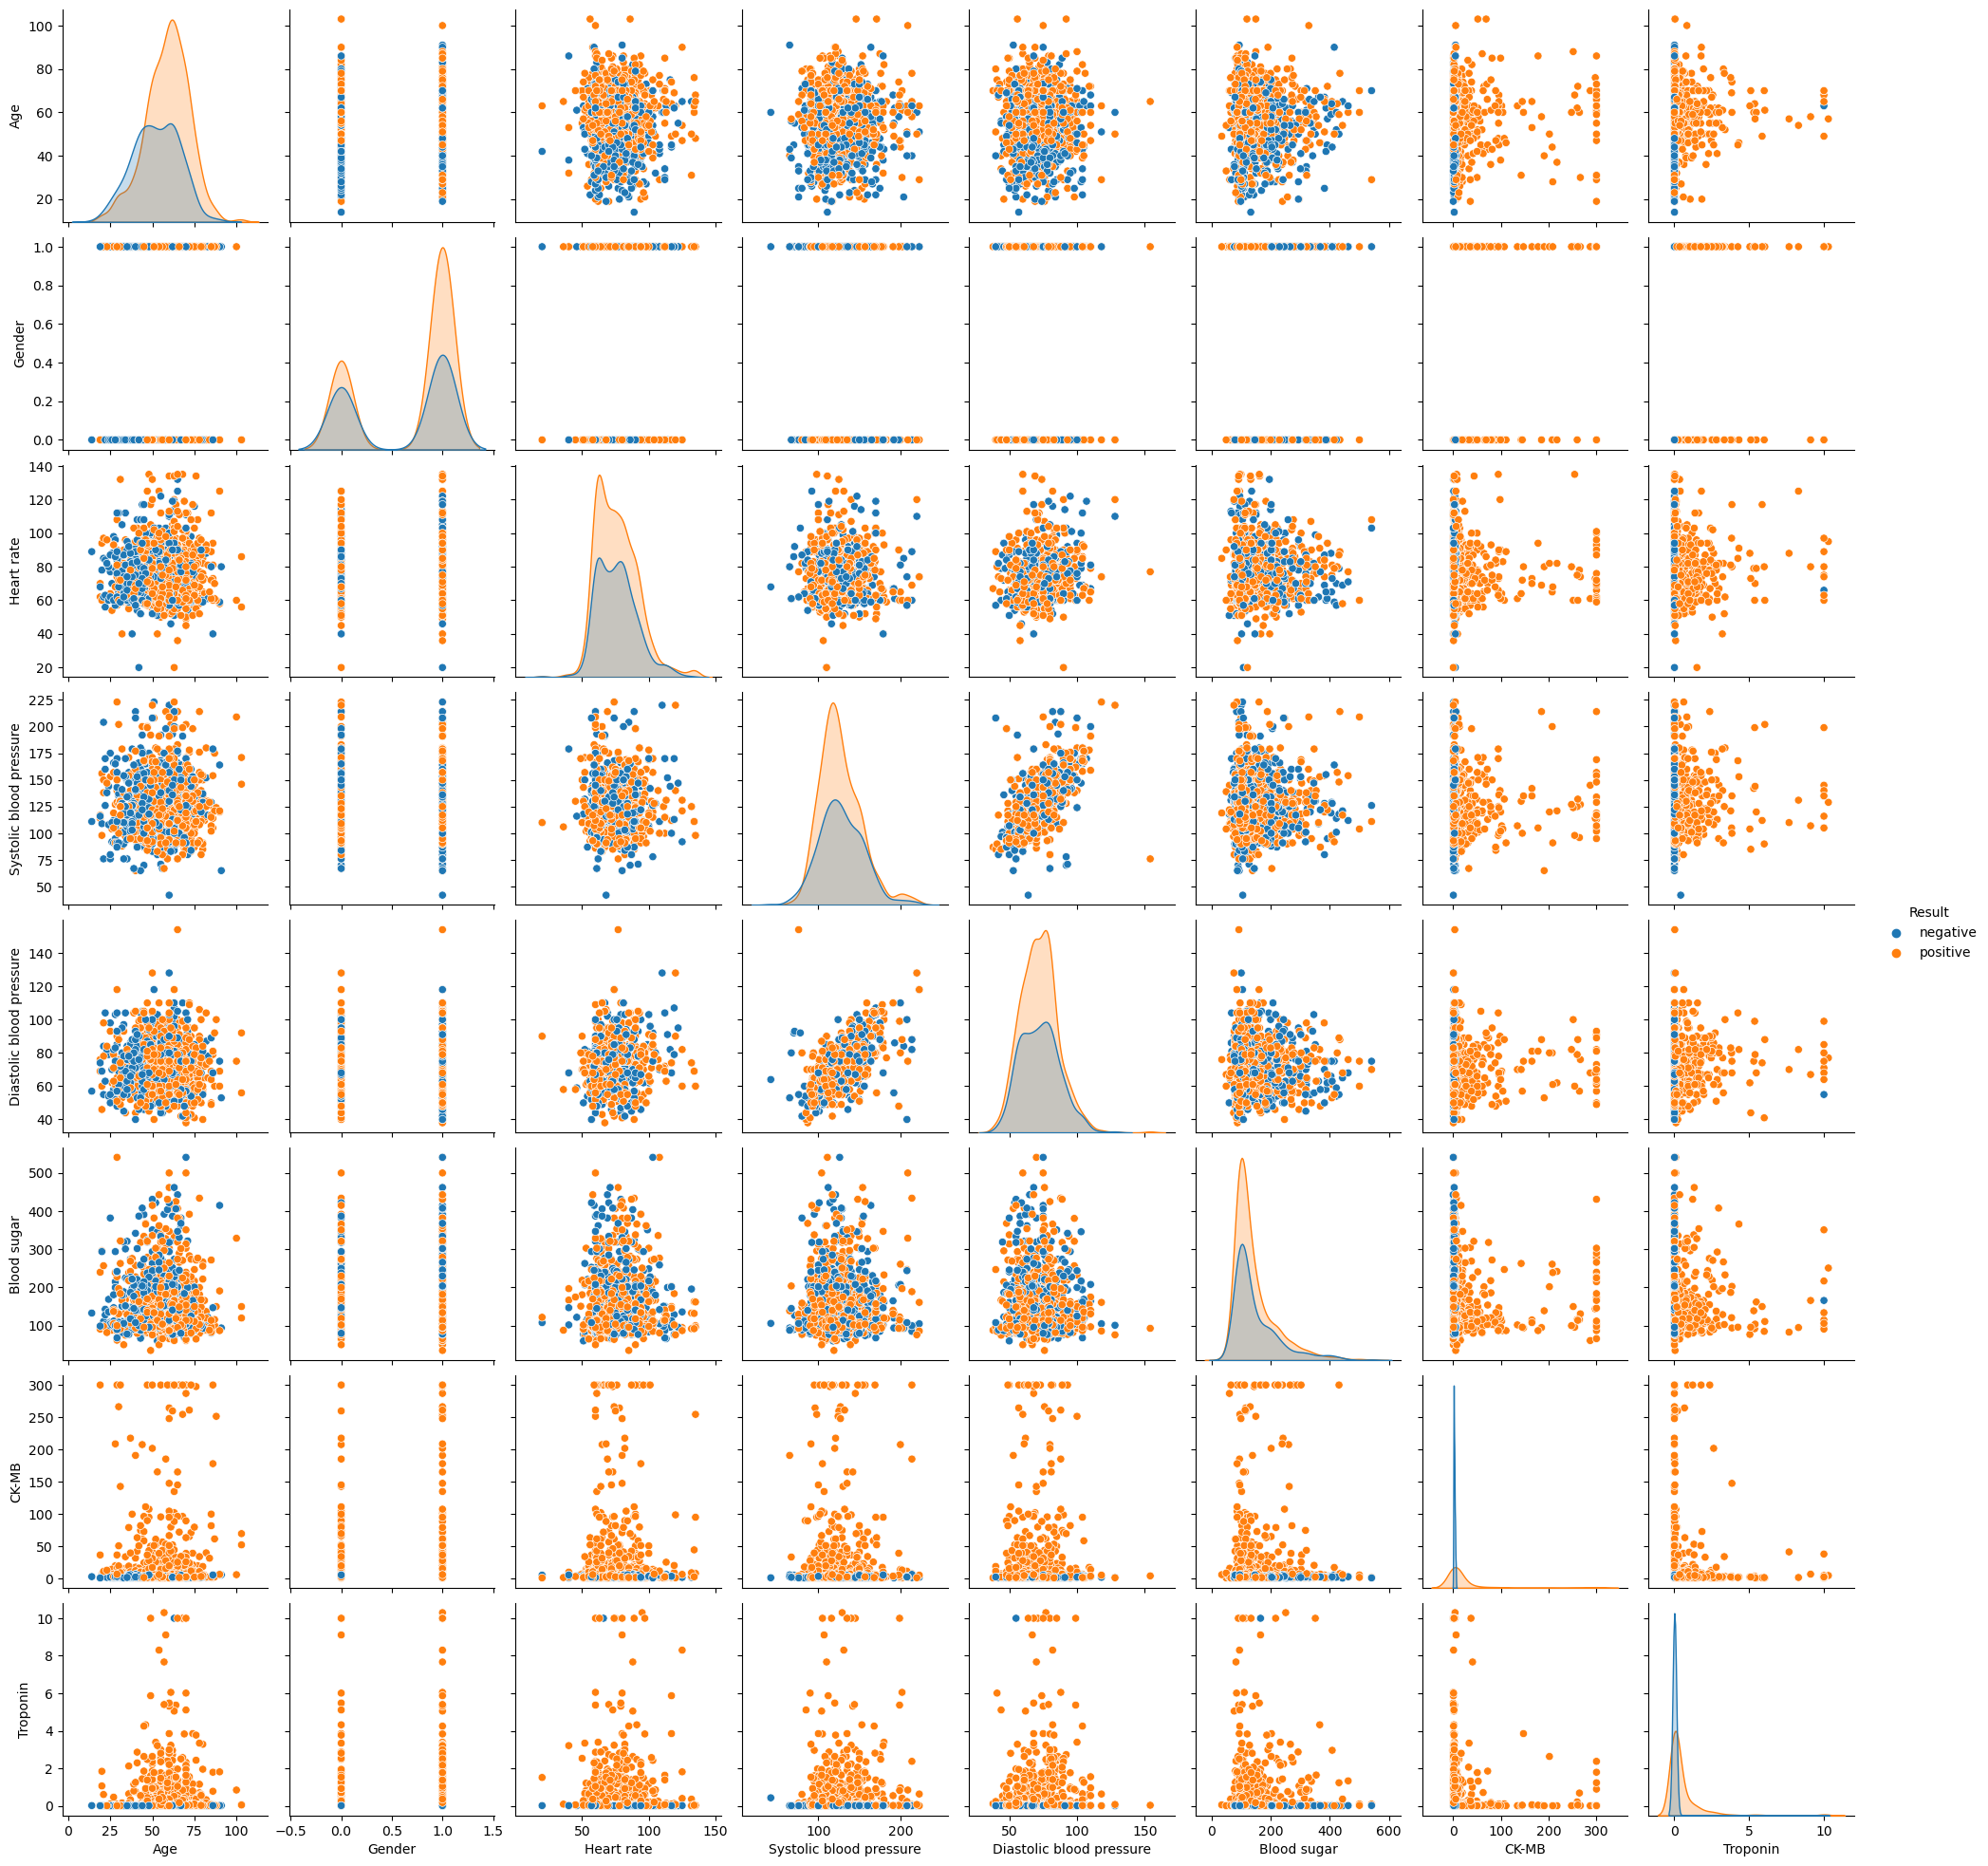

In [60]:
sns.pairplot(df, hue='Result')

plt.savefig('C:/Users/AmlanChatterjee/Documents/Project/Heart Attack/pairs.png', dpi=1000)

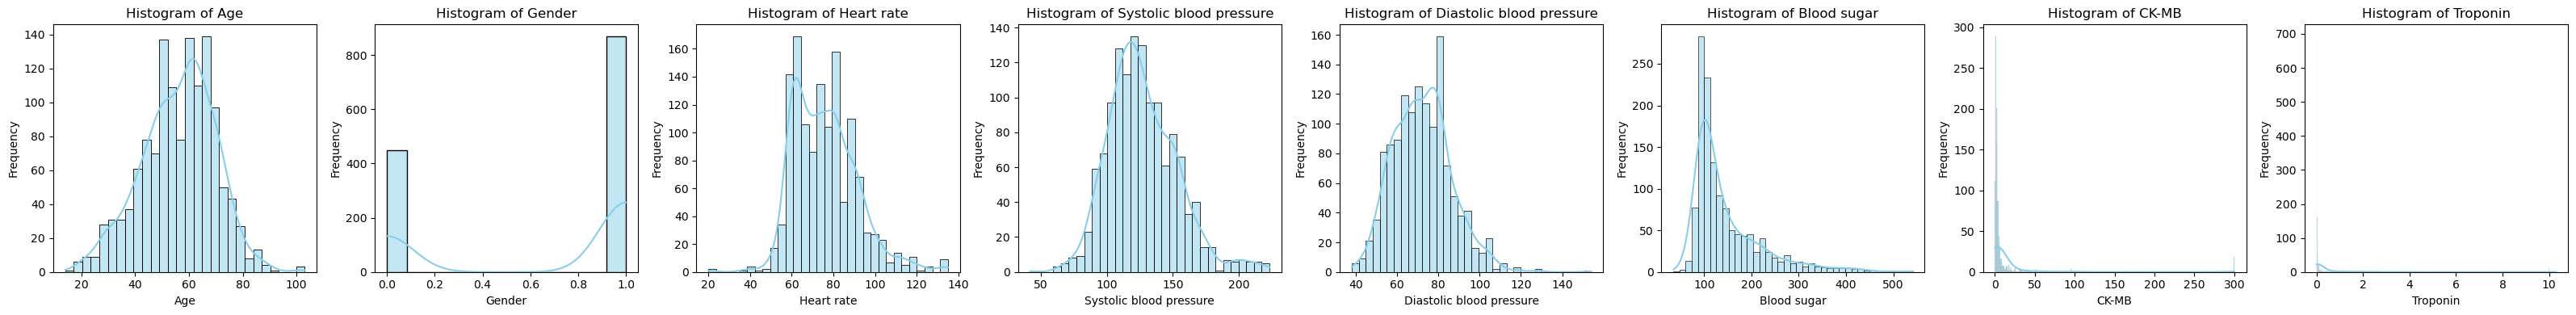

In [61]:
# Create subplots
num_cols = sum(df[column].dtype in ['int64', 'float64'] for column in df.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4*num_cols, 4))

# Plot histograms for each numerical column
for i, column in enumerate(df.columns):
    if df[column].dtype in ['int64', 'float64']:  # Check if the column contains numerical data
        sns.histplot(df[column], kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Save the plot with all histograms
plt.tight_layout()

plt.savefig('C:/Users/AmlanChatterjee/Documents/Project/Heart Attack/all_histograms.png', dpi=1000)
plt.show()

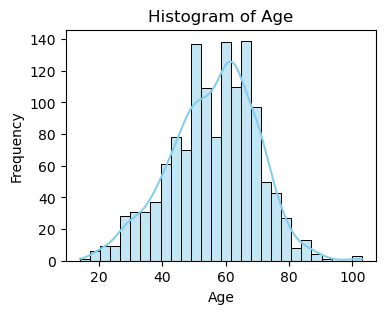

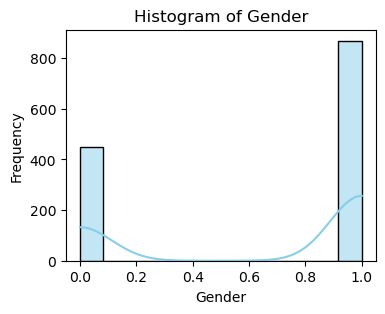

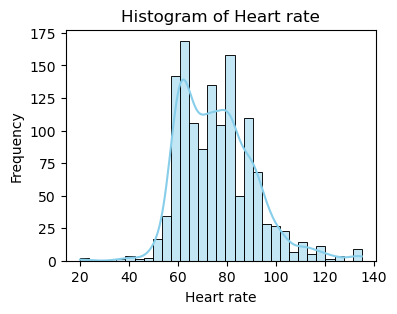

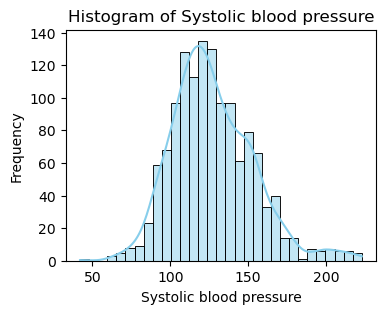

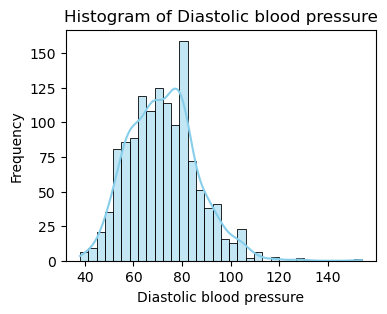

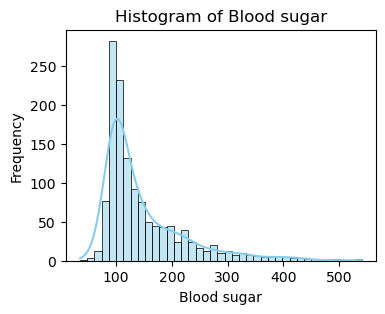

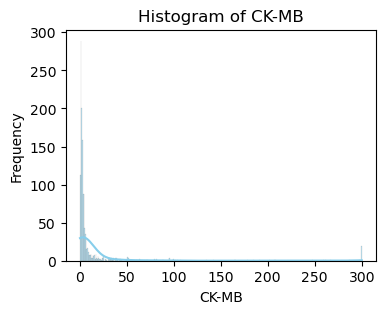

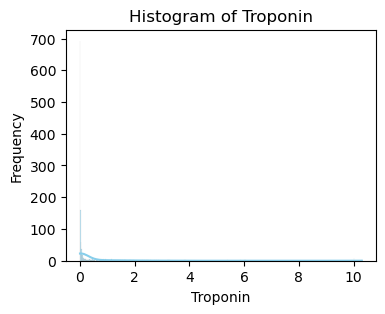

In [62]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column contains numerical data
        plt.figure(figsize=(4, 3))
        sns.histplot(df[column], kde=True, color='skyblue')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.savefig(f'C:/Users/AmlanChatterjee/Documents/Project/Heart Attack/histogram/{column}.png', dpi=600, bbox_inches='tight')
        plt.show()

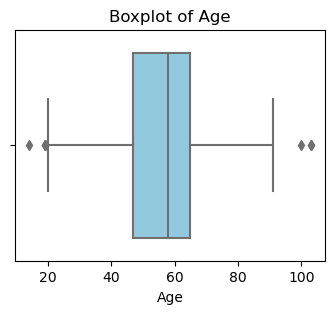

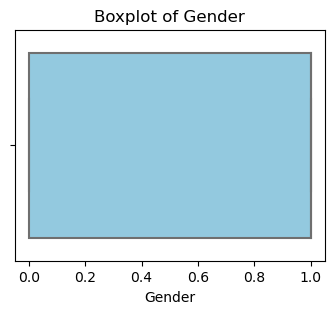

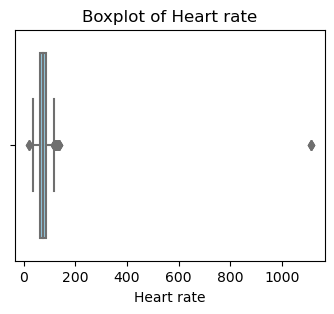

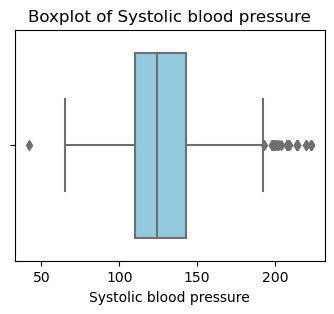

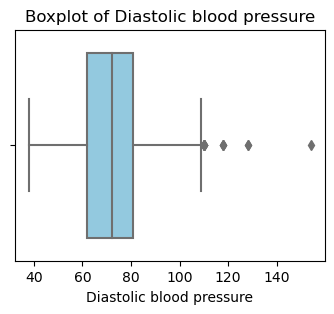

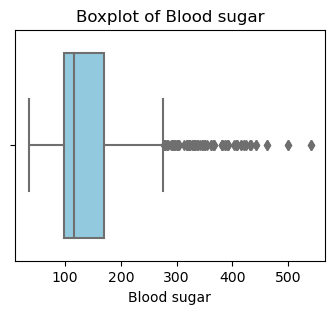

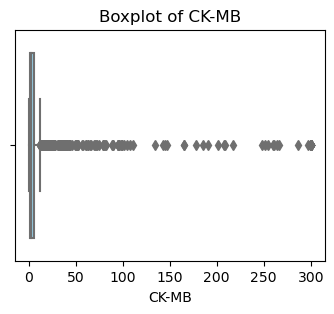

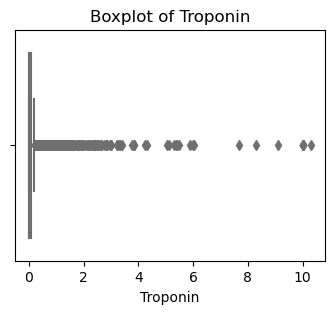

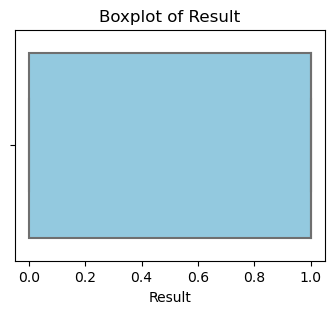

In [31]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column contains numerical data
        plt.figure(figsize=(4, 3))
        sns.boxplot(x=df[column], color='skyblue')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.savefig(f'C:/Users/AmlanChatterjee/Documents/Project/Heart Attack/boxplot/{column}.png', dpi=600, bbox_inches='tight')
        plt.show()

In [19]:
# Map string values to integers

result_mapping = {'positive': 1, 'negative': 0}


df['Result'] = df['Result'].map(result_mapping)



,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


C:\Users\AmlanChatterjee\AppData\Local\Temp\ipykernel_23408\3603080701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


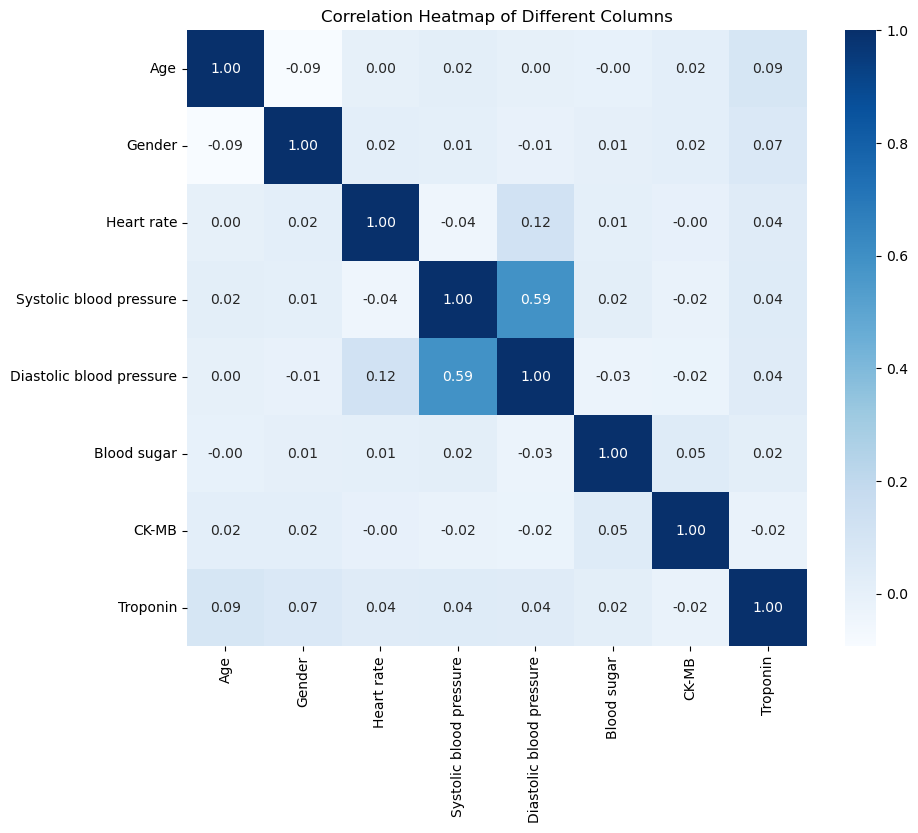

In [63]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Different Columns')
plt.savefig('C:/Users/AmlanChatterjee/Documents/Project/Heart Attack/heatmap_plot.png', dpi=1000, bbox_inches='tight')
plt.show()

In [66]:
# Map string values to integers

result_mapping = {'positive': 1, 'negative': 0}


df['Result'] = df['Result'].map(result_mapping)


from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('Result', axis=1)  # Features are all columns except 'Result'
y = df['Result']  # Target variable is 'Result'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1054, 8) (1054,)
Testing set shape: (264, 8) (264,)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

Accuracy: 0.7954545454545454
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        92
           1       0.87      0.81      0.84       172

    accuracy                           0.80       264
   macro avg       0.78      0.79      0.78       264
weighted avg       0.80      0.80      0.80       264



C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

Accuracy: 0.9696969696969697
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        92
           1       0.97      0.99      0.98       172

    accuracy                           0.97       264
   macro avg       0.97      0.96      0.97       264
weighted avg       0.97      0.97      0.97       264



In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

Accuracy: 0.9810606060606061
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        92
           1       0.99      0.98      0.99       172

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

Accuracy: 0.8106060606060606
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        92
           1       0.91      0.79      0.84       172

    accuracy                           0.81       264
   macro avg       0.80      0.82      0.80       264
weighted avg       0.83      0.81      0.81       264



In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy:", accuracy)

# Get classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

Accuracy: 0.7007575757575758
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.87      0.67        92
           1       0.90      0.61      0.73       172

    accuracy                           0.70       264
   macro avg       0.72      0.74      0.70       264
weighted avg       0.77      0.70      0.71       264



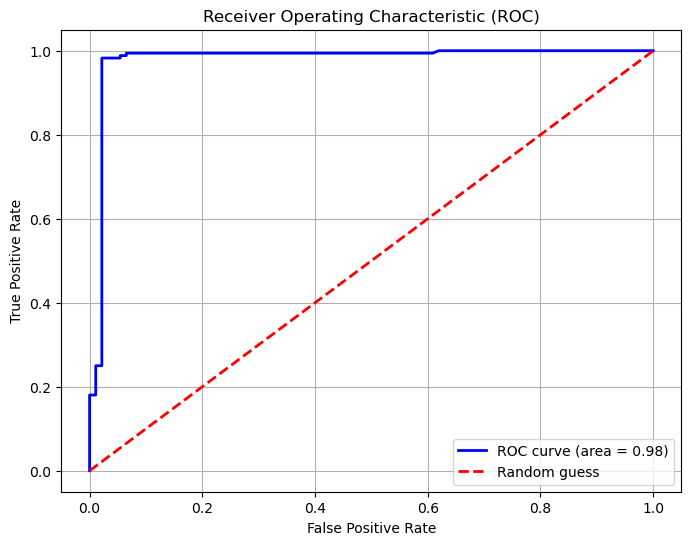

Accuracy: 0.9734848484848485

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        92
           1       0.98      0.98      0.98       172

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264



In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict probabilities on the test set
test_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, test_probabilities)
roc_auc = auc(fpr, tpr)

# Generate classification report
test_predictions = model.predict(X_test)
classification_rep = classification_report(y_test, test_predictions)

# Compute accuracy
accuracy = accuracy_score(y_test, test_predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Display accuracy
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_rep)
